<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# John  Mohsbeck
# Day 3  Lab:  Exploratory Data Analysis on IBM Attrition dataset
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)


 Numpy: 1.22.4

 sklearn: 1.2.1


In [8]:
# load a dataset from openML
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)




Age Attrition BusinessTravel  DailyRate             Department  \
1116   55        No  Travel_Rarely        685                  Sales   
743    59        No  Travel_Rarely        715  Research  Development   
970    27        No  Travel_Rarely       1291                  Sales   
654    39        No  Travel_Rarely       1383        Human Resources   
618    25        No  Travel_Rarely        180  Research  Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1116                26          5      Marketing              1   
743                  2          3  Life Sciences              1   
970                 11          3        Medical              1   
654                  2          3  Life Sciences              1   
618                  2          1        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1116            1578                        3    Male          60   
743             1032                        3  Female          69   
970             1364                        3  Female          98   
654              909                        4  Female          42   
618              854                        1    Male          65   

      JobInvolvement  JobLevel                 JobRole  JobSatisfaction  \
1116               2         5                 Manager                4   
743                2         4  Manufacturing Director                4   
970                4         1    Sales Representative                4   
654                2         2         Human Resources                4   
618                4         1      Research Scientist                1   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1116       Married          19586        23037                   1      Y   
743         Single          13726        21829                   3      Y   
970        Married           2534         6527                   8      Y   
654        Married           5204         7790                   8      Y   
618         Single           3424        21632                   7      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1116       No                 21                  4                         3   
743       Yes                 13                  3                         1   
970        No                 14                  3                         2   
654        No                 11                  3                         3   
618        No                 13                  3                         3   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1116             80                 1                 36   
743              80                 0                 30   
970              80                 1                  5   
654              80                 2                 13   
618              80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1116                      3                3              36   
743                       4                3               5   
970                       4                3               1   
654                       2                3               5   
618                       3                2               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1116                   6                        2                    13  
743                    3                        4                     3  
970                    0                        0                     0  
654                    4                        0                     4  
618                    3                        0                     1

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [14]:
df.head(5)

age attrition     businesstravel  dailyrate             department  \
0   41       yes      travel_rarely       1102                  sales   
1   49        no  travel_frequently        279  research__development   
2   37       yes      travel_rarely       1373  research__development   
3   33        no  travel_frequently       1392  research__development   
4   27        no      travel_rarely        591  research__development   

   distancefromhome  education educationfield  employeecount  employeenumber  \
0                 1          2  life_sciences              1               1   
1                 8          1  life_sciences              1               2   
2                 2          2          other              1               4   
3                 3          4  life_sciences              1               5   
4                 2          1        medical              1               7   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
0                        2  female          94               3         2   
1                        3    male          61               2         2   
2                        4    male          92               2         1   
3                        4  female          56               3         1   
4                        1    male          40               3         1   

                 jobrole  jobsatisfaction maritalstatus  monthlyincome  \
0        sales_executive                4        single           5993   
1     research_scientist                2       married           5130   
2  laboratory_technician                3        single           2090   
3     research_scientist                3       married           2909   
4  laboratory_technician                2       married           3468   

   monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
0        19479                   8      y      yes                 11   
1        24907                   1      y       no                 23   
2         2396                   6      y      yes                 15   
3        23159                   1      y      yes                 11   
4        16632                   9      y       no                 12   

   performancerating  relationshipsatisfaction  standardhours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   yearssincelastpromotion  yearswithcurrmanager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [53]:
# Pull descriptive statistics from your overall dataset
df.describe().T

count          mean          std     min      25%  \
age                       1470.0     36.923810     9.135373    18.0    30.00   
dailyrate                 1470.0    802.485714   403.509100   102.0   465.00   
distancefromhome          1470.0      9.192517     8.106864     1.0     2.00   
education                 1470.0      2.912925     1.024165     1.0     2.00   
employeecount             1470.0      1.000000     0.000000     1.0     1.00   
employeenumber            1470.0   1024.865306   602.024335     1.0   491.25   
environmentsatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
hourlyrate                1470.0     65.891156    20.329428    30.0    48.00   
jobinvolvement            1470.0      2.729932     0.711561     1.0     2.00   
joblevel                  1470.0      2.063946     1.106940     1.0     1.00   
jobsatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
monthlyincome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
monthlyrate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
numcompaniesworked        1470.0      2.693197     2.498009     0.0     1.00   
percentsalaryhike         1470.0     15.209524     3.659938    11.0    12.00   
performancerating         1470.0      3.153741     0.360824     3.0     3.00   
relationshipsatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
standardhours             1470.0     80.000000     0.000000    80.0    80.00   
stockoptionlevel          1470.0      0.793878     0.852077     0.0     0.00   
totalworkingyears         1470.0     11.279592     7.780782     0.0     6.00   
trainingtimeslastyear     1470.0      2.799320     1.289271     0.0     2.00   
worklifebalance           1470.0      2.761224     0.706476     1.0     2.00   
yearsatcompany            1470.0      7.008163     6.126525     0.0     3.00   
yearsincurrentrole        1470.0      4.229252     3.623137     0.0     2.00   
yearssincelastpromotion   1470.0      2.187755     3.222430     0.0     0.00   
yearswithcurrmanager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
age                          36.0     43.00     60.0  
dailyrate                   802.0   1157.00   1499.0  
distancefromhome              7.0     14.00     29.0  
education                     3.0      4.00      5.0  
employeecount                 1.0      1.00      1.0  
employeenumber             1020.5   1555.75   2068.0  
environmentsatisfaction       3.0      4.00      4.0  
hourlyrate                   66.0     83.75    100.0  
jobinvolvement                3.0      3.00      4.0  
joblevel                      2.0      3.00      5.0  
jobsatisfaction               3.0      4.00      4.0  
monthlyincome              4919.0   8379.00  19999.0  
monthlyrate               14235.5  20461.50  26999.0  
numcompaniesworked            2.0      4.00      9.0  
percentsalaryhike            14.0     18.00     25.0  
performancerating             3.0      3.00      4.0  
relationshipsatisfaction      3.0      4.00      4.0  
standardhours                80.0     80.00     80.0  
stockoptionlevel              1.0      1.00      3.0  
totalworkingyears            10.0     15.00     40.0  
trainingtimeslastyear         3.0      3.00      6.0  
worklifebalance               3.0      3.00      4.0  
yearsatcompany                5.0      9.00     40.0  
yearsincurrentrole            3.0      7.00     18.0  
yearssincelastpromotion       1.0      3.00     15.0  
yearswithcurrmanager          3.0      7.00     17.0

In [35]:
# Checking for Null Values 
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [56]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('attrition' + str(sorted(df['attrition'].unique())))

attrition[0, 1]


In [57]:
fill = (df.attrition == 'no')
df.loc[fill, 'attrition'] = 0
fill = (df.attrition == 'yes')
df.loc[fill, 'attrition'] = 1

In [58]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('businesstravel' + str(sorted(df['businesstravel'].unique())))

businesstravel[0, 1, 2]


In [59]:
fill = (df.businesstravel == 'non-travel')
df.loc[fill, 'businesstravel'] = 0
fill = (df.businesstravel == 'travel_frequently')
df.loc[fill, 'businesstravel'] = 1
fill = (df.businesstravel == 'travel_rarely')
df.loc[fill, 'businesstravel'] = 2

In [60]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('department' + str(sorted(df['department'].unique())))

department[0, 1, 2]


In [61]:
fill = (df.department == 'human_resources')
df.loc[fill, 'department'] = 0
fill = (df.department == 'research__development')
df.loc[fill, 'department'] = 1
fill = (df.department == 'sales')
df.loc[fill, 'department'] = 2

In [62]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('educationfield' + str(sorted(df['educationfield'].unique())))

educationfield[0, 1, 2, 3, 4, 5]


In [63]:
fill = (df.educationfield == 'human_resources')
df.loc[fill, 'educationfield'] = 0
fill = (df.educationfield == 'life_sciences')
df.loc[fill, 'educationfield'] = 1
fill = (df.educationfield == 'marketing')
df.loc[fill, 'educationfield'] = 2
fill = (df.educationfield == 'medical')
df.loc[fill, 'educationfield'] = 3
fill = (df.educationfield == 'other')
df.loc[fill, 'educationfield'] = 4
fill = (df.educationfield == 'technical_degree')
df.loc[fill, 'educationfield'] = 5


In [64]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('gender ' + str(sorted(df['gender'].unique())))

gender [0, 1]


In [65]:
fill = (df.gender == 'female')
df.loc[fill, 'gender'] = 0
fill = (df.gender == 'male')
df.loc[fill, 'gender'] = 1

In [66]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('jobrole' + str(sorted(df['jobrole'].unique())))

jobrole[0, 1, 2, 3, 4, 5]


In [67]:
fill = (df.jobrole == 'healthcare_representative')
df.loc[fill, 'jobrole'] = 0
fill = (df.jobrole == 'human_resources')
df.loc[fill, 'jobrole'] = 1
fill = (df.jobrole == 'laboratory_technician')
df.loc[fill, 'jobrole'] = 2
fill = (df.jobrole == 'manager')
df.loc[fill, 'jobrole'] = 3
fill = (df.jobrole == 'manufacturing_director')
df.loc[fill, 'jobrole'] = 4
fill = (df.jobrole == 'research_director')
df.loc[fill, 'jobrole'] = 5
fill = (df.jobrole == 'research_scientist')
df.loc[fill, 'jobrole'] = 6
fill = (df.jobrole == 'sales_executive')
df.loc[fill, 'jobrole'] = 7
fill = (df.jobrole == 'sales_representative')
df.loc[fill, 'jobrole'] = 8


In [68]:
print('maritalstatus' + str(sorted(df['maritalstatus'].unique())))

maritalstatus[0, 1, 2]


In [69]:
fill = (df.maritalstatus == 'divorced')
df.loc[fill, 'maritalstatus'] = 0
fill = (df.maritalstatus == 'married')
df.loc[fill, 'maritalstatus'] = 1
fill = (df.maritalstatus == 'single')
df.loc[fill, 'maritalstatus'] = 2

In [70]:
print('over18' + str(sorted(df['over18'].unique())))

over18[0]


In [71]:
fill = (df.over18 == 'y')
df.loc[fill, 'over18'] = 0

In [72]:
print('overtime' + str(sorted(df['overtime'].unique())))

overtime[0, 1]


In [73]:
fill = (df.overtime == 'no')
df.loc[fill, 'overtime'] = 0
fill = (df.overtime == 'yes')
df.loc[fill, 'overtime'] = 1

<AxesSubplot:xlabel='attrition', ylabel='count'>

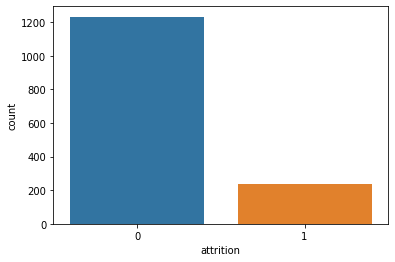

In [51]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 
# Think about this... when you did a "describe" - you were analyzing the numeric cols... one at a time
sns.countplot(x="attrition", data=df)

In [52]:
df['attrition'].value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [81]:
237 / (1233 + 237)

0.16122448979591836

In [82]:
df['attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: attrition, dtype: float64

<AxesSubplot:xlabel='jobrole', ylabel='count'>

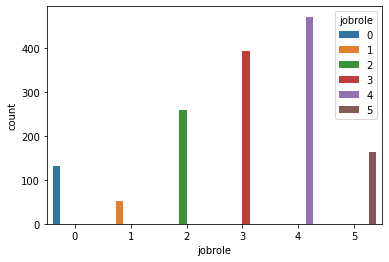

In [86]:
sns.countplot(x="jobrole", data=df, hue='jobrole')

In [87]:
df['department'].value_counts()

1    961
2    446
0     63
Name: department, dtype: int64

In [88]:
df['department'].value_counts(normalize=True)

1    0.653741
2    0.303401
0    0.042857
Name: department, dtype: float64

<AxesSubplot:xlabel='department', ylabel='count'>

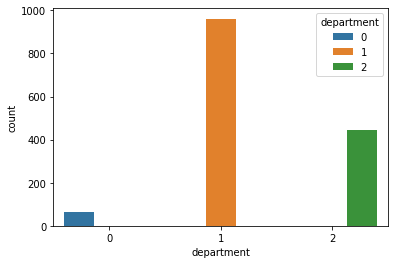

In [89]:
sns.countplot(x="department", data=df, hue='department')

In [90]:
df['educationfield'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: educationfield, dtype: int64

In [91]:
df['educationfield'].value_counts(normalize=True)

1    0.412245
3    0.315646
2    0.108163
5    0.089796
4    0.055782
0    0.018367
Name: educationfield, dtype: float64

<AxesSubplot:xlabel='educationfield', ylabel='count'>

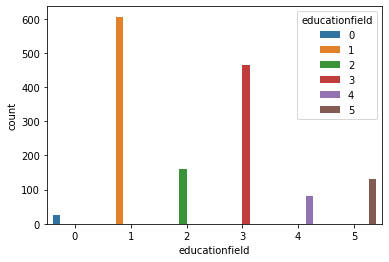

In [92]:
sns.countplot(x="educationfield", data=df, hue='educationfield')

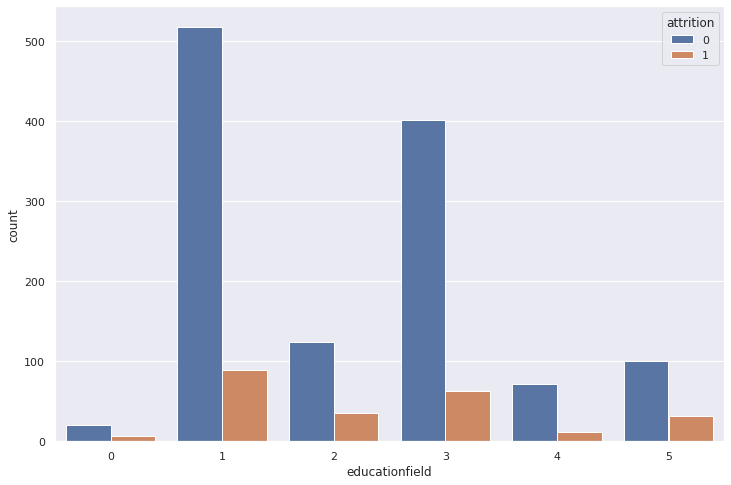

In [95]:
# Bivariate Analysis
sns.set(rc={'figure.figsize':(12,8)})
edu = sns.countplot(x='educationfield', hue='attrition', data=df)
plt.show()

In [96]:
pd.crosstab(df.educationfield,df.attrition,margins=True)

attrition          0    1   All
educationfield                 
0                 20    7    27
1                517   89   606
2                124   35   159
3                401   63   464
4                 71   11    82
5                100   32   132
All             1233  237  1470

In [97]:
pd.crosstab(df.educationfield,df.attrition,normalize='index',margins=True)

attrition              0         1
educationfield                    
0               0.740741  0.259259
1               0.853135  0.146865
2               0.779874  0.220126
3               0.864224  0.135776
4               0.865854  0.134146
5               0.757576  0.242424
All             0.838776  0.161224

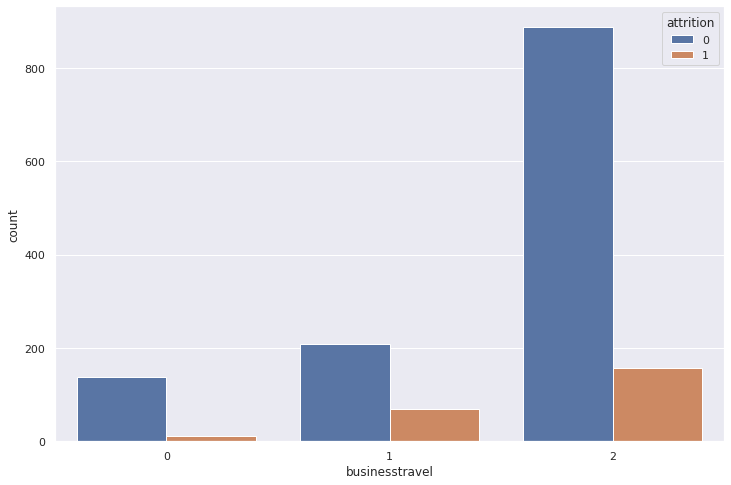

In [100]:
sns.set(rc={'figure.figsize':(12,8)})
bustravel= sns.countplot(x="businesstravel", hue='attrition', data=df)
plt.show()

In [ ]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT          0         1
MARRIAGE                    
1         0.765283  0.234717
2         0.790717  0.209283
3         0.763926  0.236074
All       0.778800  0.221200

In [ ]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT      0     1    All
PAY_1                      
-2        2394   365   2759
-1        4732   954   5686
0        12849  1888  14737
1         2436  1252   3688
2          823  1844   2667
3           78   244    322
4           24    52     76
5           13    13     26
6            5     6     11
7            2     7      9
8            8    11     19
All      23364  6636  30000

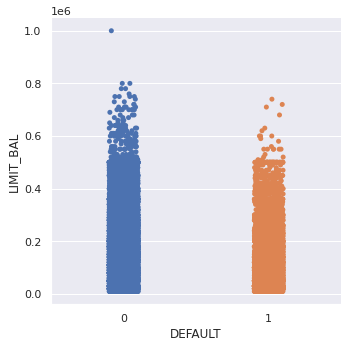

In [ ]:
sns.catplot(x="DEFAULT", y="LIMIT_BAL", jitter=True, data=df);

In [ ]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT     0    1
AGE               
21         53   14
22        391  169
23        684  247
24        827  300
25        884  302
26       1003  253
27       1164  313
28       1123  286
29       1292  313
30       1121  274
31        988  229
32        933  225
33        931  215
34        931  231
35        887  226
36        854  254
37        812  229
38        750  194
39        755  199
40        683  187
41        639  185
42        609  185
43        520  150
44        538  162
45        501  116
46        413  157
47        381  120
48        362  104
49        333  119
50        310  101
51        252   88
52        226   78
53        251   74
54        191   56
55        152   57
56        129   49
57         95   27
58         91   31
59         62   21
60         44   23
61         35   21
62         37    7
63         23    8
64         22    9
65         19    5
66         18    7
67         11    5
68          4    1
69         12    3
70          8    2
71          3    0
72          2    1
73          1    3
74          1    0
75          2    1
79          1    0

In [ ]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT         0         1
AGE                        
21       0.791045  0.208955
22       0.698214  0.301786
23       0.734694  0.265306
24       0.733807  0.266193
25       0.745363  0.254637
26       0.798567  0.201433
27       0.788084  0.211916
28       0.797019  0.202981
29       0.804984  0.195016
30       0.803584  0.196416
31       0.811832  0.188168
32       0.805699  0.194301
33       0.812391  0.187609
34       0.801205  0.198795
35       0.796945  0.203055
36       0.770758  0.229242
37       0.780019  0.219981
38       0.794492  0.205508
39       0.791405  0.208595
40       0.785057  0.214943
41       0.775485  0.224515
42       0.767003  0.232997
43       0.776119  0.223881
44       0.768571  0.231429
45       0.811994  0.188006
46       0.724561  0.275439
47       0.760479  0.239521
48       0.776824  0.223176
49       0.736726  0.263274
50       0.754258  0.245742
51       0.741176  0.258824
52       0.743421  0.256579
53       0.772308  0.227692
54       0.773279  0.226721
55       0.727273  0.272727
56       0.724719  0.275281
57       0.778689  0.221311
58       0.745902  0.254098
59       0.746988  0.253012
60       0.656716  0.343284
61       0.625000  0.375000
62       0.840909  0.159091
63       0.741935  0.258065
64       0.709677  0.290323
65       0.791667  0.208333
66       0.720000  0.280000
67       0.687500  0.312500
68       0.800000  0.200000
69       0.800000  0.200000
70       0.800000  0.200000
71       1.000000  0.000000
72       0.666667  0.333333
73       0.250000  0.750000
74       1.000000  0.000000
75       0.666667  0.333333
79       1.000000  0.000000
All      0.778800  0.221200

In [ ]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<AxesSubplot:>

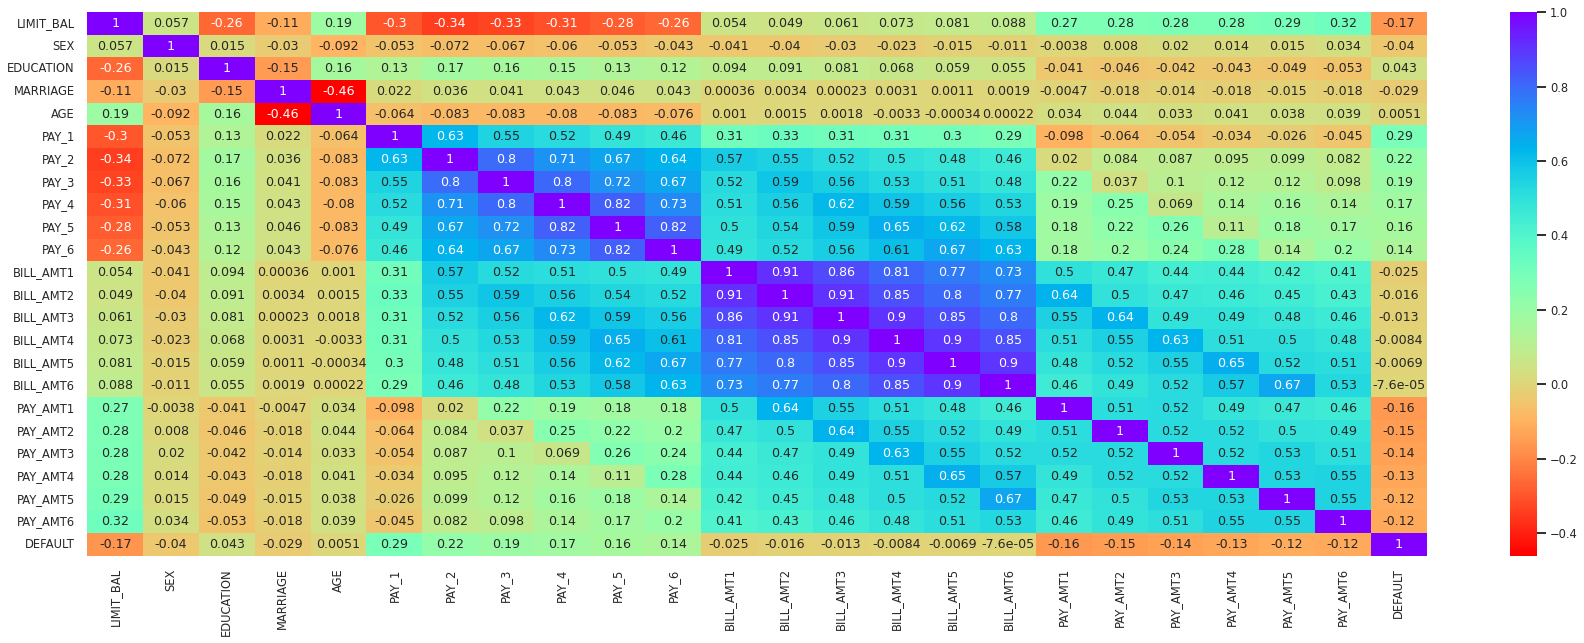

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [ ]:
df.drop("DEFAULT", axis=1).apply(lambda x: x.corr(df.DEFAULT,method='spearman')).sort_values(ascending=False)


PAY_1        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
EDUCATION    0.043425
AGE          0.005149
BILL_AMT6   -0.000076
BILL_AMT5   -0.006851
BILL_AMT4   -0.008357
BILL_AMT3   -0.012670
ID          -0.013952
BILL_AMT2   -0.015554
BILL_AMT1   -0.025327
MARRIAGE    -0.028698
SEX         -0.039961
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
PAY_AMT4    -0.127979
PAY_AMT3    -0.139388
PAY_AMT2    -0.150977
PAY_AMT1    -0.160493
LIMIT_BAL   -0.169586
dtype: float64

In [ ]:
!pip install pandas-profiling==3.2.0
!pip install markupsafe==2.0.1
# https://pypi.org/project/pandas-profiling/3.1.0/#history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 KB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 32.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cdca21d32a27a918b7649cc7a29f9ecd03ffee42b5079d5348827020e9a38524
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv", na_values = -999)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]